In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
from google.colab import files
uploaded = files.upload()


Saving exercise.csv to exercise.csv
Saving calories.csv to calories.csv


In [6]:
# Load both datasets
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')

# Merge them on 'User_ID'
data = pd.merge(exercise, calories, on='User_ID')

# Show first 5 rows
data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# Basic info
print(data.info())
print(data.describe())

# Encode gender
data['Gender'] = data['Gender'].map({'male': 1, 'female': 0})

# Check null values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000

In [8]:
# Features and target
X = data.drop(columns=['User_ID', 'Calories'])
y = data['Calories']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [10]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9672937151257296
MAE: 8.441513553849697
RMSE: 11.48894014915287


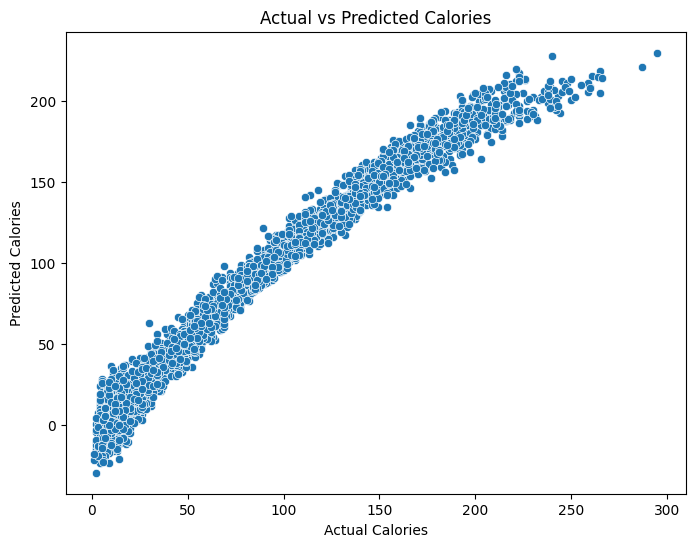

In [11]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


In [18]:
sample_input = pd.DataFrame({
    'Gender': [0],
    'Age': [25],
    'Height': [180],
    'Weight': [60],
    'Duration': [30],
    'Heart_Rate': [500],
    'Body_Temp': [32]
})

predicted_calories = model.predict(sample_input)
print("Predicted Calories Burned:", predicted_calories[0])


Predicted Calories Burned: 1113.1514485086423
